In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:
df = pd.read_csv('data-2324-no-ver.csv')

In [ ]:
df.head()

,incident_id,report_id,date_coded,url,file,screenshot,date_posted,format,transcript,summary_content,...,text_around_deepfake,harm_evidence,communication_goal,core_frame,hero,villain,plot,moral,domain,year
0,203,17,2024-02-12,https://twitter.com/DouglasLucas/status/171631...,Screenshot 2024-02-12 at 12.47.24 PM.png (http...,NaN,2023-10-23,image,NaN,"Two polaroid photographs, the one one the righ...",...,AI and the end of photographic truth? Deceptiv...,political_interference,education,human_interest,Joe Biden,Putin,Putin and Biden hugging,U.S. and Russian leaders can get along,twitter.com,2023.0
1,186,18,2024-02-04,https://twitter.com/21WIRE/status/165300993699...,"""Patrick Henningsen on X_ _⭕️ Granted, this mu...",NaN,2023-05-01,video,"""Today is today, and yesterday was today yeste...",Kamala Harris is speaking at a rally and her s...,...,"⭕️ Granted, this must be a deep fake, but rega...",non_identifiable,"satire,entertainment,harm_reputation",human_interest,A Leader Who Sounds Smart and Capable During S...,Kamala Harris Rambling and Not Making Sense Du...,"Kamala's speech does not make sense, which lea...",Kamala Harris's credibility as VP should be qu...,twitter.com,2023.0
2,187,19,2024-02-05,https://www.facebook.com/reel/894486844951526,deepfake 19.html (https://v5.airtableuserconte...,NaN,2023-05-03,video,"“Today is today, and yesterday is today yester...",The sharer posted a video showing her reacting...,...,"""Our VP: 'I can only hit this bong 1 more time...",other,"satire,entertainment,harm_reputation",human_interest,Intelligent Manner. and People Expect That A C...,Online Users Believe That Harris Is A Rambler.,Kamala Harris is shown to be giving a speech t...,Kamala Harris is portrayed as being unable to ...,www.facebook.com,2023.0
3,188,20,2024-02-05,https://twitter.com/JebraFaushay/status/165937...,Deepfake 20.html (https://v5.airtableuserconte...,NaN,2023-05-18,video,"""Excuse me, excuse me. I need everyone in the ...","The video shows Donald Trump, Mike Pence, and ...",...,Is this real? I feel like it might be a deep f...,other,"satire,entertainment,harm_reputation","conflict,human_interest",His Squad To Dress In Drag. and The Freedom Fo...,Republicans Who Want To Ban Drag.,"Republicans want to ban drag, but Donald Trump...",Republicans should stop calling for drag to be...,twitter.com,2023.0
4,201,25,2024-02-09,https://twitter.com/JackPosobiec/status/163383...,Screenshot 2024-02-09 134519.png (https://v5.a...,NaN,2023-03-09,video,I'll tell you something the deepfake that Jack...,AOC announcing her opinions with regards to ho...,...,"""The deepfake that Jack Posobiec made of Presi...",political_interference,"entertainment,harm_political_interference,acti...","responsibility,conflict","Poso'S Supposters, Those Who Share His Ideology","Aoc, and Other Related Gov. Officials Who Shar...",Biden and AOC do not understand how to priorit...,we must take a stand against their choices to ...,twitter.com,2023.0


There are three main columns depicting different textual features related to high-level deepfake narratives: `content_summary`, `plot` and `moral`.
(There are also lower-level details such as `text_around_deepfake` and `transcript`, but let's explore the broader themes first).

In [ ]:
df['plot'].value_counts()

,count
plot,
Election 2024,12
Kamala Harris is a communist.,8
election 2024,7
unknown,6
"Harris is a communist, Trump is not",5
...,...
Donald Trump is being pelted with hotdogs.,1
Donald Trump is being pictured next to the symbol for the Soviet Union.,1
claims that VP Harris is a communist,1


In [ ]:
df['moral'].value_counts()

,count
moral,
Vote for Trump,6
Donald Trump is a criminal.,5
Vote for Trump.,5
unknown,5
Kamala Harris is a communist.,4
...,...
"politicians working together; bowing down to ""King"" Biden",1
Trump and Musk are buddies.,1
Harris showing support for her opponent,1


In [ ]:
df['summary_content'].value_counts()

,count
summary_content,
Kamala Harris speaking out into a communist crowd.,3
Biden is addressing Americans using foul language as a rebuttal to what people have said about him.,2
Hilary is behind bars.,2
It is a video of Donald Trump and Elon Musk dancing together on a street.,2
"Kamala Harris is presenting at Howard University, saying a combination of words that seemingly make no sense.",2
...,...
"Chinese President Xi Jinping, Russian President Vladimir Putin, and Former U.S. President Donald Trump standing cordially in a circle reaching out to share hands.",1
"Donald Trump, Vladimir Putin, and Xi Jinping are laughing together.",1
"Former U.S. President Donald Trump, Chinese President Xi Jinping, and Russian President Vladimir Putin standing together very cordially. President Xi Jinping appears to be extending his hand towards President Trump for a handshake.",1


In the context of our dataset:
* `plot` refers to "What happens in the deepfake?"
  * This tends to be event-based (e.g., "Trump is being pelted with hotdogs") → Good for identifying dominant storylines.

* `moral` refers to "What is the implied takeaway?"
  * This often contains explicit calls to action or ideological framing (e.g., "Vote for Trump") → Useful for sentiment analysis or moral framing classification (e.g., pro-Trump vs. anti-Trump).

* `summary_content` refers to "What is being depicted overall?"
  * This captures the full narrative (actors + framing + themes), having a mix of both plot and moral framing, plus extra context → Ideal for full-fledged narrative topic modeling

Each column gives different insights into the narrative structure, but `summary_content` seems to be the most comprehensive, so let's do topic modeling on that

We will use [BERTopic](https://maartengr.github.io/BERTopic/index.html) for this task.

In [ ]:
!pip install bertopic
!pip install umap-learn
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

^C
^C


In [ ]:
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
from bertopic import BERTopic
import re

In [ ]:
def clean_text(text):
  """
  Cleans text for BERTopic pipeline.
  """
  text = text.lower()  # Lowercase
  text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  return text

contents = df['summary_content'].dropna().apply(clean_text).to_list()
contents[:10]

['two polaroid photographs the one one the right is black with the blotch of red in the middle the left is putin and biden hugging ',
 'kamala harris is speaking at a rally and her speech is extremely repetitive and doesnt make a lot of sense ',
 'the sharer posted a video showing her reacting to the deepfake of kamala harris talking at a rally ',
 'the video shows donald trump mike pence and lindsey graham dressed in drag donald trump is asking his republican supports to stop drag bans because he loves dressing in drag ',
 'aoc announcing her opinions with regards to how the ukraine was affects bipoc and lgbt and how the us should be the one involving themselves in these issues even when they dont have funds posoblec responds stating his video was a deepfake and his opinions about the war and aoc negative',
 'the video shows a news clip from tucker carlsons segment on fox news discussing a problematic update to a video game ',
 'the video shows clips from the movie stir crazy where tr

In [ ]:
len(contents)

714

In [ ]:
with open('contents.pickle', 'wb') as handle:
    pickle.dump(contents, handle, protocol=pickle.HIGHEST_PROTOCOL)

714 is a moderate number for applying BERTopic.

In [ ]:
# First, embed the text using a transformer model

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # Lightweight but effective
embeddings = embedding_model.encode(contents, show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:01<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/23 [00:00<?, ?it/s]

In [ ]:
# Apply UMAP (Dimensionality Reduction)
umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine')

# Apply HDBSCAN for Clustering
hdbscan_model = hdbscan.HDBSCAN(metric='euclidean', cluster_selection_method='eom')

# Apply BERTopic
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, verbose=True)
topics, probs = topic_model.fit_transform(contents, embeddings)

# View Top Topics
topic_model.get_topic_info()

2025-03-26 20:31:15,397 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-26 20:31:17,052 - BERTopic - Dimensionality - Completed ✓
2025-03-26 20:31:17,054 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-26 20:31:17,081 - BERTopic - Cluster - Completed ✓
2025-03-26 20:31:17,087 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-03-26 20:31:17,153 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,177,-1_of_is_the_donald,"[of, is, the, donald, an, and, trump, image, h...",[it is a screenshot of donald trumps post of k...
1,0,51,0_elon_musk_dancing_are,"[elon, musk, dancing, are, and, donald, trump,...","[donald trump is dancing with elon musk, donal..."
2,1,37,1_kamala_harris_clown_vp,"[kamala, harris, clown, vp, is, picture, of, m...",[kamala harris is depicted laughing and holdin...
3,2,36,2_african_black_republican_hat,"[african, black, republican, hat, depicted, po...",[three ai generated images of donald trump wit...
4,3,25,3_prison_wearing_jumpsuit_uniform,"[prison, wearing, jumpsuit, uniform, orange, t...",[donald trump is walking through a dark tunnel...
5,4,21,4_macron_joker_crowds_street,"[macron, joker, crowds, street, president, dre...",[president macron is standing in a hallway smi...
6,5,20,5_police_by_officers_detained,"[police, by, officers, detained, being, arrest...",[donald trump is being forcibly detained by po...
7,6,19,6_biden_ai_debate_twitch,"[biden, ai, debate, twitch, and, parody, podiu...",[ai trump and ai biden are at fake podiums tru...
8,7,19,7_speaking_communist_crowd_soldiers,"[speaking, communist, crowd, soldiers, rally, ...",[kamala harris is at a communist rally speakin...
9,8,16,8_taylor_swift_for_post,"[taylor, swift, for, post, vote, swifties, shi...",[it is a screenshot of donald trumps post of a...


In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info = topic_info[topic_info.Topic != -1]  # Ignore the outliers
top_topics = topic_info.sort_values('Count', ascending=False).head(5) # Get top 5

for topic in top_topics.Topic:
  representative_doc = topic_model.get_representative_docs(topic)[0] # Get the representative document ID as a string
  representative_doc_index = contents.index(representative_doc) # Find the index of the representative document in 'contents'
  print(f"Topic {topic}:")
  print(f"  Most Representative Doc: {contents[representative_doc_index]}")
  print(f"  Number of Docs: {top_topics[top_topics.Topic == topic]['Count'].values[0]}")
  print("\n")

Topic 0:
  Most Representative Doc: donald trump is dancing with elon musk
  Number of Docs: 51


Topic 1:
  Most Representative Doc: kamala harris is depicted laughing and holding hands with a communist clown 
  Number of Docs: 37


Topic 2:
  Most Representative Doc: three ai generated images of donald trump with black voters encouraging them to vote republican trump is shown at a doorstep with black americans and the voters are wearing maga hats 
  Number of Docs: 36


Topic 3:
  Most Representative Doc: donald trump is walking through a dark tunnel or alley while wearing a prison uniform this makes it seem as though he is escaping prison
  Number of Docs: 25


Topic 4:
  Most Representative Doc: president macron is standing in a hallway smiling while dressed as the joker he has his face painted like the joker and he is wearing a green and purple suit
  Number of Docs: 21




In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(contents)
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

100%|██████████| 36/36 [00:00<00:00, 261.83it/s]

.
├─kamala_harris_communist_speaking_soviet
│    ├─kamala_harris_communist_chicago_of
│    │    ├─■──drinking_bottle_kamala_harris_vodka ── Topic: 15
│    │    └─kamala_harris_communist_chicago_image
│    │         ├─kamala_harris_clown_communist_picture
│    │         │    ├─kamala_harris_clown_picture_it
│    │         │    │    ├─■──kamala_harris_clown_vp_is ── Topic: 1
│    │         │    │    └─■──communist_stalin_joseph_picture_flag ── Topic: 34
│    │         │    └─■──communist_comrade_kamala_own_joy ── Topic: 36
│    │         └─■──chicago_massive_image_hammerandsickle_which ── Topic: 26
│    └─communist_speaking_soviet_flags_soldiers
│         ├─■──nazi_podium_behind_flags_standing ── Topic: 10
│         └─communist_soviet_speaking_kamala_union
│              ├─communist_speaking_crowd_kamala_harris
│              │    ├─■──speaking_communist_crowd_soldiers_rally ── Topic: 7
│              │    └─■──front_hill_communist_capitol_flag ── Topic: 33
│              └─■──soviet_uni

Some observations from the result:

1. **Themes of Misinformation, Deepfakes & Satirical Depictions**  
   - Many topics reference **edited images or deepfake content** about **Trump, Kamala Harris, Biden, Macron, and others**.
   - Example: *Kamala Harris as a "communist"*, *Trump in prison*, *Macron as the Joker*.

2. **Grouping of AI-Generated and Symbolic Political Imagery**  
   - The hierarchy suggests strong connections between **AI-generated images, political satire, and symbols (e.g., MAGA hats, communist flags, clown imagery)**.
   - Example: *AI-generated images of Trump with Black voters encouraging them to vote Republican (Topic 2)*.

3. **Trump and Harris as Key Entities**  
   - **Trump and Harris** appear frequently as **central nodes**, suggesting they are dominant figures in the dataset.
   - Even though there are many more different figures, they are usually depicted _together with_ these two central ones

4. **Thematic Branching in the Tree Structure**  
   - Topics tend to **branch into more specific subcategories**, such as:
     - **Communist Kamala Harris** → *Soviet imagery, clown depictions*.
     - **Trump AI-generated images** → *Prison narratives, Black voter manipulation*.
     - **Deepfake/Misinformation** → *Biden, Macron, Ron DeSantis*.

In [ ]:
# Save the model in case we need it later
topic_model.save("topic_model_narrative", serialization="safetensors", save_ctfidf=True, save_embedding_model=True)

In [ ]:
!zip -r topic_model_narrative.zip topic_model_narrative
from google.colab import files
files.download("topic_model_narrative.zip")

  adding: topic_model_narrative/ (stored 0%)
  adding: topic_model_narrative/topics.json (deflated 77%)
  adding: topic_model_narrative/config.json (deflated 43%)
  adding: topic_model_narrative/ctfidf_config.json (deflated 68%)
  adding: topic_model_narrative/ctfidf.safetensors (deflated 61%)
  adding: topic_model_narrative/topic_embeddings.safetensors (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Going into deeper details...

Now that we've observed the broader narratives depicted in the data, let's go a bit deeper. Among these stories, who are usually illustrated as heros, and who are the villains? What are the interaction among them?

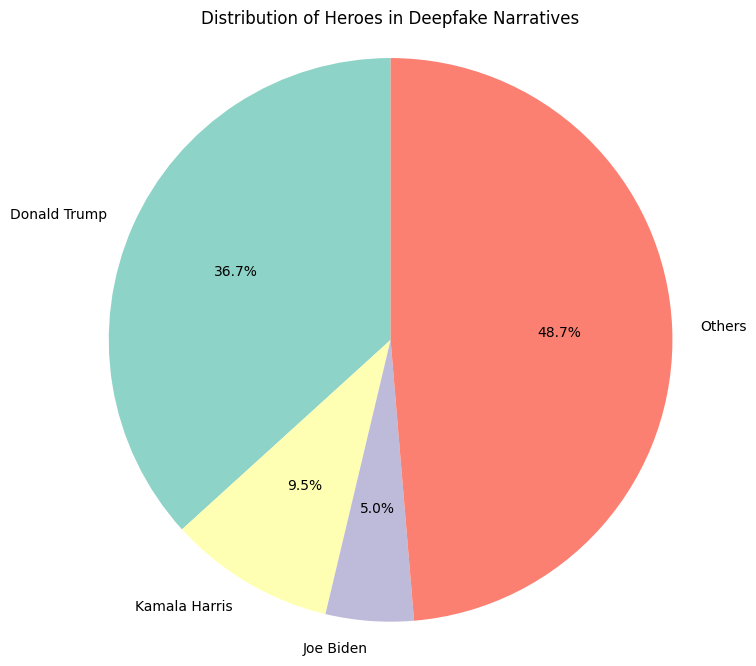

In [ ]:
def process_col(col_str):
  """Processes hero strings to handle multiple heroes and create individual entries."""
  if pd.isnull(col_str):
    return []
  heroes = col_str.split(" and ")
  processed_heroes = []
  for hero in heroes:
      processed_heroes.extend(hero.split(", "))
  return processed_heroes

# Apply the processing function to the 'hero' column
all_heroes = []
for index, row in df.iterrows():
    heroes = process_col(row['hero'])
    all_heroes.extend(heroes)

# Count hero occurrences
hero_counts = pd.Series(all_heroes).value_counts()

# Calculate the threshold for "Others"
threshold = 0.05 * hero_counts.sum()

# Group heroes below the threshold (5%) as "Others"
hero_counts_processed = hero_counts.copy()
others_count = 0
for hero, count in hero_counts.items():
  if count < threshold:
      others_count += count
      hero_counts_processed = hero_counts_processed.drop(hero)
hero_counts_processed['Others'] = others_count

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(hero_counts_processed, labels=hero_counts_processed.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribution of Heroes in Deepfake Narratives')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


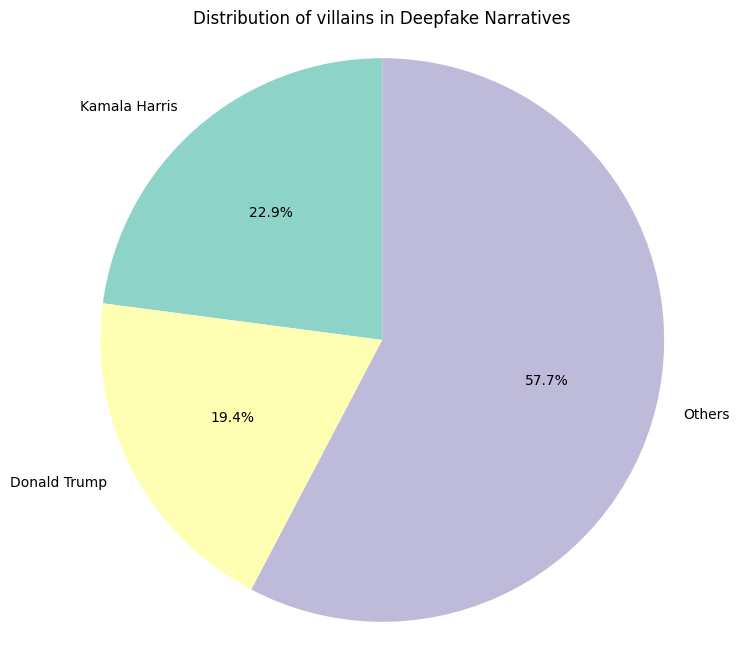

In [ ]:
# Apply the processing function to the 'villain' column
all_villaines = []
for index, row in df.iterrows():
    villaines = process_col(row['villain'])
    all_villaines.extend(villaines)

# Count villain occurrences
villain_counts = pd.Series(all_villaines).value_counts()

# Calculate the threshold for "Others"
threshold = 0.05 * villain_counts.sum()

# Group villaines below the threshold (5%) as "Others"
villain_counts_processed = villain_counts.copy()
others_count = 0
for villain, count in villain_counts.items():
  if count < threshold:
      others_count += count
      villain_counts_processed = villain_counts_processed.drop(villain)
villain_counts_processed['Others'] = others_count

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(villain_counts_processed, labels=villain_counts_processed.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribution of villains in Deepfake Narratives')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Consistent to what we've observed above, Trump and Kamala are the most depicted figures in the narratives. We can see that Trump are more generally portrayed as heroes, and Kamala are seen as more "villain".

There are a lot in the "Others" category, though, but it's much more sparse. Let's see a few samples:

In [ ]:
# Filter out heroes and villains from the "Others" category
others_heroes = [hero for hero, count in hero_counts.items() if count < threshold]
others_villains = [villain for villain, count in villain_counts.items() if count < threshold]

# Select 5 random samples from the combined list
import random
num_samples = 5
random_others_heroes = random.sample(others_heroes, min(num_samples, len(others_heroes)))
random_others_villains = random.sample(others_villains, min(num_samples, len(others_villains)))

# Print samples and their counts
print("Random hero samples from 'Others' category:")
for sample in random_others_heroes:
  hero_count = hero_counts.get(sample, 0)
  print(f"Sample: {sample}, Count: {hero_count}")

print('-'*20)
print("Random villain samples from 'Others' category:")
for sample in random_others_villains:
  villain_count = villain_counts.get(sample, 0)
  print(f"Sample: {sample}, Count: {villain_count}")

Random hero samples from 'Others' category:
Sample: The Us Not Turning Into A Communist State, Count: 1
Sample: Pence, Count: 1
Sample: Jfk, Count: 1
Sample: Vladimir Putin, Count: 1
Sample: Phillip Buchanan, Count: 1
--------------------
Random villain samples from 'Others' category:
Sample: Russian, Count: 1
Sample: Communism, Count: 5
Sample: Fauci, Count: 1
Sample: Bureaucracy Or Inefficient Governance (Implied By The Concept Of "Government Efficiency"), Count: 1
Sample: Trump. Jr, Count: 2


Sometimes it's not just public figures, but also an ideology (`Communism`), a concept (`The Us Not Turning Into A Communist State`), a department (`Bureaucracy Or Inefficient Governance`), or the whole country (`Russian`) being demonstrated as heroes or villains. The topics are indeed very diverse. It's not the most representative of the dataset due to insufficient value count, but are still interesting to be aware of and if possible, track their popularity forward in the future.

Now let's take a look at the interaction among these actors

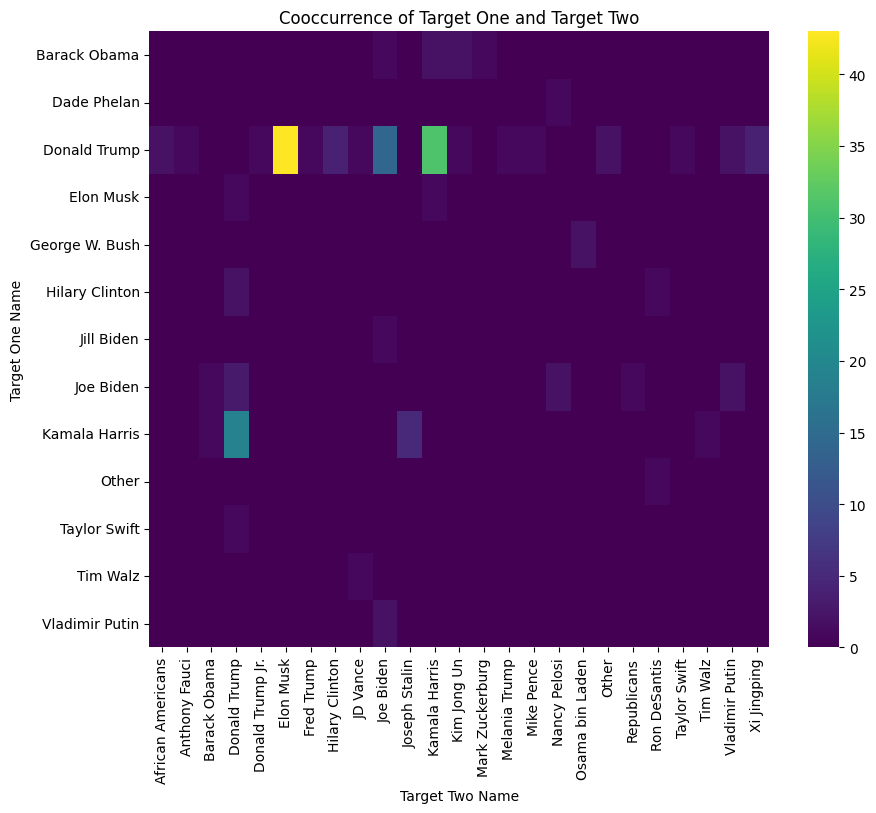

In [ ]:
# Create a contingency table of target_one_name and target_two_name
cooccurrence_matrix = pd.crosstab(df['target_one_name'], df['target_two_name'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cooccurrence_matrix, annot=False, cmap='viridis', fmt='d')
plt.title('Cooccurrence of Target One and Target Two')
plt.xlabel('Target Two Name')
plt.ylabel('Target One Name')
plt.show()

Most frequently depicted together: Donald Trump and Kamala Harris, Donald Trump and Elon Musk, Donald Trump and Joe Biden (so it's very central on Trump).

Let's see how the sentiment changes when these 3 pairs are illustrated together.

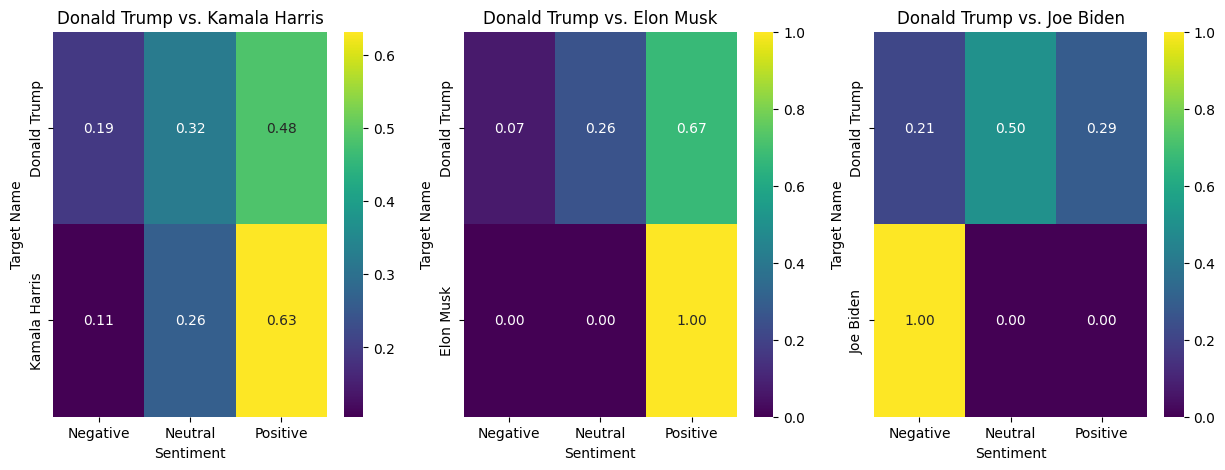

In [ ]:
def plot_sentiment_heatmap(df, target_one, target_two, ax=None):
  """
  Plots a heatmap of sentiment for a given pair of targets.

  Args:
    df: Pandas DataFrame with sentiment data.
    target_one: Name of the first target.
    target_two: Name of the second target.
  """
  # Filter the DataFrame for the specified target pairs
  filtered_df = df[((df['target_one_name'] == target_one) & (df['target_two_name'] == target_two)) |
                   ((df['target_one_name'] == target_two) & (df['target_two_name'] == target_one))]

  # Create a contingency table of sentiment counts
  sentiment_counts = pd.crosstab(filtered_df['target_one_name'], filtered_df['target_one_sentiment'])

  # Normalize the counts by the y-axis (target names)
  sentiment_counts_normalized = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)

  # Plot the heatmap
  sns.heatmap(sentiment_counts_normalized, annot=True, cmap='viridis', fmt=".2f", ax=ax)
  ax.set_title(f"{target_one} vs. {target_two}")
  ax.set_xlabel("Sentiment")
  ax.set_ylabel("Target Name")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

plot_sentiment_heatmap(df, 'Donald Trump', 'Kamala Harris', ax=ax1)
plot_sentiment_heatmap(df, 'Donald Trump', 'Elon Musk', ax=ax2)
plot_sentiment_heatmap(df, 'Donald Trump', 'Joe Biden', ax=ax3)
plt.show()


For Trump, when with Kamala, he's mostly presented as Positive, same as Kamala (even more generally Positive in terms of count?) - though there are a small portion being neutral and negative.

With Elon Musk - when they appear together, Musk is always (100%) viewed Positive, though with Trump being occasionally negative or neutral.

And with Biden, he's no longer predominantly Positive - now Trump is mainly Neutral, but Biden is _always_ viewed Negative when depicted with Trump!

This is quite interesting given both Kamala and Biden are "opponents" of Trump. It therefore makes sense seeing Biden depicted very negatively when with Trump, but there are more mixed sentiments when it comes to Kamala.

### General Archetypes

So far we've looked into the more specific narratives of dominant actors, now let's zoom out a bit and assign the data with more generalized archetypes, which we can use for regression analysis later

In [ ]:
!unzip topic_model_narrative.zip

Archive:  topic_model_narrative.zip
   creating: topic_model_narrative/
  inflating: topic_model_narrative/topics.json  
  inflating: topic_model_narrative/config.json  
  inflating: topic_model_narrative/ctfidf_config.json  
  inflating: topic_model_narrative/ctfidf.safetensors  
  inflating: topic_model_narrative/topic_embeddings.safetensors  


In [ ]:
with open('contents.pickle', 'rb') as handle:
    contents = pickle.load(handle)

In [ ]:
topic_model = BERTopic.load("topic_model_narrative")
topic_model.get_document_info(contents)

2025-05-23 21:34:01,276 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model. If you want to also load in an embedding model, make sure to use `BERTopic.load(my_model, embedding_model=my_embedding_model)`.


,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,two polaroid photographs the one one the right...,-1,-1_of_is_the_donald,"[of, is, the, donald, an, and, trump, image, h...",NaN,of - is - the - donald - an - and - trump - im...,False
1,kamala harris is speaking at a rally and her s...,-1,-1_of_is_the_donald,"[of, is, the, donald, an, and, trump, image, h...",NaN,of - is - the - donald - an - and - trump - im...,False
2,the sharer posted a video showing her reacting...,31,31_crowd_video_billions_attending,"[crowd, video, billions, attending, glitches, ...",NaN,crowd - video - billions - attending - glitche...,False
3,the video shows donald trump mike pence and li...,9,9_drag_queen_mike_pence,"[drag, queen, mike, pence, figures, various, p...",NaN,drag - queen - mike - pence - figures - variou...,False
4,aoc announcing her opinions with regards to ho...,25,25_aoc_video_joe_biden,"[aoc, video, joe, biden, discussing, gaza, opi...",NaN,aoc - video - joe - biden - discussing - gaza ...,False
...,...,...,...,...,...,...,...
709,donald trump and elon musk are sitting talking...,0,0_elon_musk_dancing_are,"[elon, musk, dancing, are, and, donald, trump,...",NaN,elon - musk - dancing - are - and - donald - t...,False
710,donald trump is riding a horse with eagle wing...,20,20_horse_goat_knights_castle,"[horse, goat, knights, castle, riding, on, shi...",NaN,horse - goat - knights - castle - riding - on ...,False
711,it is a picture of kamala harris shaking hands...,-1,-1_of_is_the_donald,"[of, is, the, donald, an, and, trump, image, h...",NaN,of - is - the - donald - an - and - trump - im...,False
712,it is an image of barack obamas face in front ...,2,2_african_black_republican_hat,"[african, black, republican, hat, depicted, po...",NaN,african - black - republican - hat - depicted ...,False


In [ ]:
topic_model.get_document_info(contents).to_csv('doc2topic.csv', index=False)

Retrieve representative document for each topic

In [ ]:
doc_topic = pd.DataFrame({
    'Topic': topic_model.topics_,
    'ID': range(len(topic_model.topics_)),
    'Document': contents}
)

repr_docs, _, _, _ = topic_model._extract_representative_docs(
    c_tf_idf=topic_model.c_tf_idf_,
    documents=doc_topic,
    topics=topic_model.topic_representations_,
    nr_samples=1000,
    nr_repr_docs=5
    )
repr_docs

{-1: ['it is an image of kamala harris speaking out into a communist crowd',
  'it is a screenshot of donald trumps post of kamala harris in front of soldiers holding communist flags',
  'it is a screenshot of donald trumps post of kamala harris in front of soldiers holding communist flags',
  'the image is a picture of donald trump and the background is the soviet union flag ',
  'it is an image of hillary clinton donald trump and barack obama at a party'],
 0: ['elon and trump are dancing',
  'it is a video of donald trump and elon musk dancing together',
  'donald trump is dancing with elon musk',
  'donald trump is dancing with elon musk',
  'donald trump and elon musk are dancing '],
 1: ['kamala harris is dressed as a clown in face makeup ',
  'they are pictures of kamala harris dressed up as a clown',
  'kamala harris is depicted laughing and holding hands with a communist clown ',
  'kamala is with a clown ',
  'it is a picture of kamala harris dressed as a clown'],
 2: ['forme

In [ ]:
with open('repr_docs.pickle', 'wb') as handle:
    pickle.dump(repr_docs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
topic_model.representative_docs_ = repr_docs

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,177,-1_of_is_the_donald,"[of, is, the, donald, an, and, trump, image, h...",[it is an image of kamala harris speaking out ...
1,0,51,0_elon_musk_dancing_are,"[elon, musk, dancing, are, and, donald, trump,...","[elon and trump are dancing, it is a video of ..."
2,1,37,1_kamala_harris_clown_vp,"[kamala, harris, clown, vp, is, picture, of, m...",[kamala harris is dressed as a clown in face m...
3,2,36,2_african_black_republican_hat,"[african, black, republican, hat, depicted, po...",[former president donald trump with his arms a...
4,3,25,3_prison_wearing_jumpsuit_uniform,"[prison, wearing, jumpsuit, uniform, orange, t...",[donald trump is running through the rain in a...
5,4,21,4_macron_joker_crowds_street,"[macron, joker, crowds, street, president, dre...",[macron is standing in a street in front of cr...
6,5,20,5_police_by_officers_detained,"[police, by, officers, detained, being, arrest...",[former president donald trump being stopped b...
7,6,19,6_biden_ai_debate_twitch,"[biden, ai, debate, twitch, and, parody, podiu...",[trump and biden are at fake podiums labeled a...
8,7,19,7_speaking_communist_crowd_soldiers,"[speaking, communist, crowd, soldiers, rally, ...",[kamala harris speaking out into a communist c...
9,8,16,8_taylor_swift_for_post,"[taylor, swift, for, post, vote, swifties, shi...",[a picture of trumps post with ai generated cr...


In [ ]:
topic_model.get_topic_info().to_csv('narrative_topics.csv')

Now we'll start labeling the topics into broader categories and themes, but first let's rearrange this topic according to the hierarchy earlier to make things easier to distinct.

In [ ]:
import re

# hierarchy string obtained above
hierarchy_str = """
├─kamala_harris_communist_speaking_soviet
│    ├─kamala_harris_communist_chicago_of
│    │    ├─■──drinking_bottle_kamala_harris_vodka ── Topic: 15
│    │    └─kamala_harris_communist_chicago_image
│    │         ├─kamala_harris_clown_communist_picture
│    │         │    ├─kamala_harris_clown_picture_it
│    │         │    │    ├─■──kamala_harris_clown_vp_is ── Topic: 1
│    │         │    │    └─■──communist_stalin_joseph_picture_flag ── Topic: 34
│    │         │    └─■──communist_comrade_kamala_own_joy ── Topic: 36
│    │         └─■──chicago_massive_image_hammerandsickle_which ── Topic: 26
│    └─communist_speaking_soviet_flags_soldiers
│         ├─■──nazi_podium_behind_flags_standing ── Topic: 10
│         └─communist_soviet_speaking_kamala_union
│              ├─communist_speaking_crowd_kamala_harris
│              │    ├─■──speaking_communist_crowd_soldiers_rally ── Topic: 7
│              │    └─■──front_hill_communist_capitol_flag ── Topic: 33
│              └─■──soviet_union_flag_forward_uniforms ── Topic: 17
└─trump_and_donald_the_is
     ├─trump_donald_and_is_in
     │    ├─trump_is_donald_the_prison
     │    │    ├─trump_donald_taylor_american_is
     │    │    │    ├─drag_queen_pence_mike_figures
     │    │    │    │    ├─■──bars_hillary_hilary_clinton_behind ── Topic: 35
     │    │    │    │    └─■──drag_queen_mike_pence_figures ── Topic: 9
     │    │    │    └─trump_donald_taylor_american_for
     │    │    │         ├─taylor_american_trump_african_black
     │    │    │         │    ├─taylor_swift_for_horse_post
     │    │    │         │    │    ├─■──horse_goat_knights_castle_riding ── Topic: 20
     │    │    │         │    │    └─■──taylor_swift_for_post_vote ── Topic: 8
     │    │    │         │    └─african_black_american_with_republican
     │    │    │         │         ├─■──african_black_republican_hat_depicted ── Topic: 2
     │    │    │         │         └─■──american_flag_holding_behind_with ── Topic: 13
     │    │    │         └─cats_boat_cat_kittens_trump
     │    │    │              ├─■──boat_an_image_it_cat ── Topic: 29
     │    │    │              └─■──cats_kittens_cat_rowing_saving ── Topic: 11
     │    │    └─prison_macron_police_the_while
     │    │         ├─bag_doritos_can_seen_nacho
     │    │         │    ├─■──bag_doritos_nacho_on_dorito ── Topic: 27
     │    │         │    └─can_seen_cocaine_his_oval
     │    │         │         ├─■──can_seen_cocaine_smiling_his ── Topic: 12
     │    │         │         └─■──serving_mcdonalds_favorite_employee_cooking ── Topic: 30
     │    │         └─prison_macron_police_wearing_the
     │    │              ├─prison_wearing_jumpsuit_while_uniform
     │    │              │    ├─■──prison_wearing_jumpsuit_uniform_orange ── Topic: 3
     │    │              │    └─■──deepfake_shows_photo_images_the ── Topic: 19
     │    │              └─macron_police_joker_crowds_being
     │    │                   ├─■──police_by_officers_detained_being ── Topic: 5
     │    │                   └─■──macron_joker_crowds_street_president ── Topic: 4
     │    └─elon_musk_are_and_donald
     │         ├─elon_musk_are_and_donald
     │         │    ├─love_kamala_pregnant_harris_having
     │         │    │    ├─■──pregnant_father_hands_her_holding ── Topic: 32
     │         │    │    └─love_having_together_baby_kamala
     │         │    │         ├─■──baby_video_love_having_relationship ── Topic: 23
     │         │    │         └─■──each_love_kamala_together_having ── Topic: 22
     │         │    └─■──elon_musk_dancing_are_and ── Topic: 0
     │         └─■──xi_jinping_putin_vladimir_chinese ── Topic: 16
     └─biden_joe_video_about_to
          ├─biden_joe_ai_about_and
          │    ├─■──joe_military_biden_board_philadelphia ── Topic: 14
          │    └─biden_ai_about_and_joe
          │         ├─biden_ai_about_debate_language
          │         │    ├─■──about_biden_addressing_aliens_speech ── Topic: 18
          │         │    └─■──biden_ai_debate_twitch_and ── Topic: 6
          │         └─■──aoc_video_joe_biden_discussing ── Topic: 25
          └─video_deepfake_desantis_because_could
               ├─video_crowd_then_billions_attending
               │    ├─■──crowd_video_billions_attending_glitches ── Topic: 31
               │    └─■──video_cigarette_desert_cowboy_bandana ── Topic: 24
               └─deepfake_because_could_ron_they
                    ├─■──ron_desantis_boy_indictement_means ── Topic: 28
                    └─■──deepfake_could_they_online_videos ── Topic: 21
"""

# Extract all Topic numbers in the order they appear
topic_ids = [int(m.group(1)) for m in re.finditer(r'Topic:\s*(\d+)', hierarchy_str)]

In [ ]:
df_topic = topic_model.get_topic_info()

In [ ]:
df_topic_reind = df_topic.set_index('Topic').reindex(topic_ids)
df_topic_reind.head()

,Count,Name,Representation,Representative_Docs
Topic,,,,
15,13,15_drinking_bottle_kamala_harris,"[drinking, bottle, kamala, harris, vodka, glas...",[someone who looks like kamala harris is sitti...
1,37,1_kamala_harris_clown_vp,"[kamala, harris, clown, vp, is, picture, of, m...",[kamala harris is dressed as a clown in face m...
34,7,34_communist_stalin_joseph_picture,"[communist, stalin, joseph, picture, flag, she...",[it is an image of kamala harris and joseph st...
36,6,36_communist_comrade_kamala_own,"[communist, comrade, kamala, own, joy, nothing...","[kamala is a communist at a rally , kamala is ..."
26,9,26_chicago_massive_image_hammerandsickle,"[chicago, massive, image, hammerandsickle, whi...",[the image is an aigenerated deepfake depictin...


In [ ]:
df_topic_reind.to_csv('narrative_topics_reind.csv')

From here we do manual labeling for dominant actors and archetypes since it's pretty straightforward and there's only 37 rows, and edit to the narrative_topics_reind above.